In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import joblib
import librosa
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
%matplotlib inline

# Loading Data

In [2]:
import kagglehub

path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

c:\Users\221sa\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\221sa\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


In [3]:
df = pd.read_csv(r"C:\Users\221sa\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\features_30_sec.csv")

In [4]:
df.shape

(1000, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [6]:
df["label"].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

# Exploratory Data Analysis

In [7]:
sample_audio = r"C:\Users\221sa\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\pop\pop.00015.wav"

In [8]:
data, sr = librosa.load(sample_audio, sr=22050)

In [9]:

ipd.Audio(data,rate=sr)

Text(129.84722222222223, 0.5, 'Amplitude')

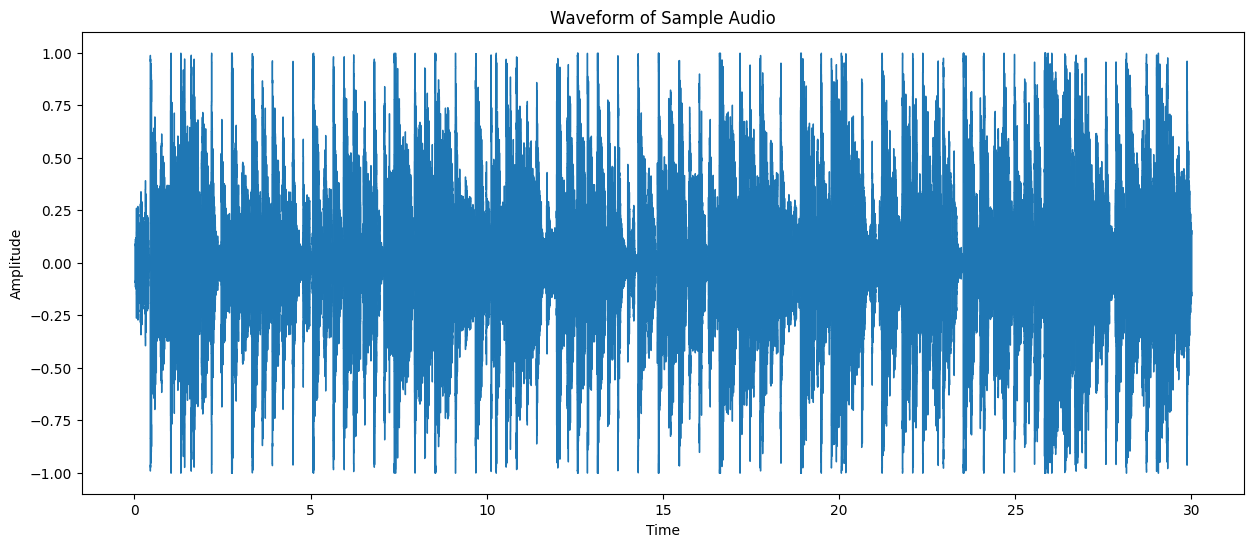

In [10]:
plt.figure(figsize=(15,6))
librosa.display.waveshow(data, sr=sr)
plt.title("Waveform of Sample Audio")
plt.ylabel("Amplitude")

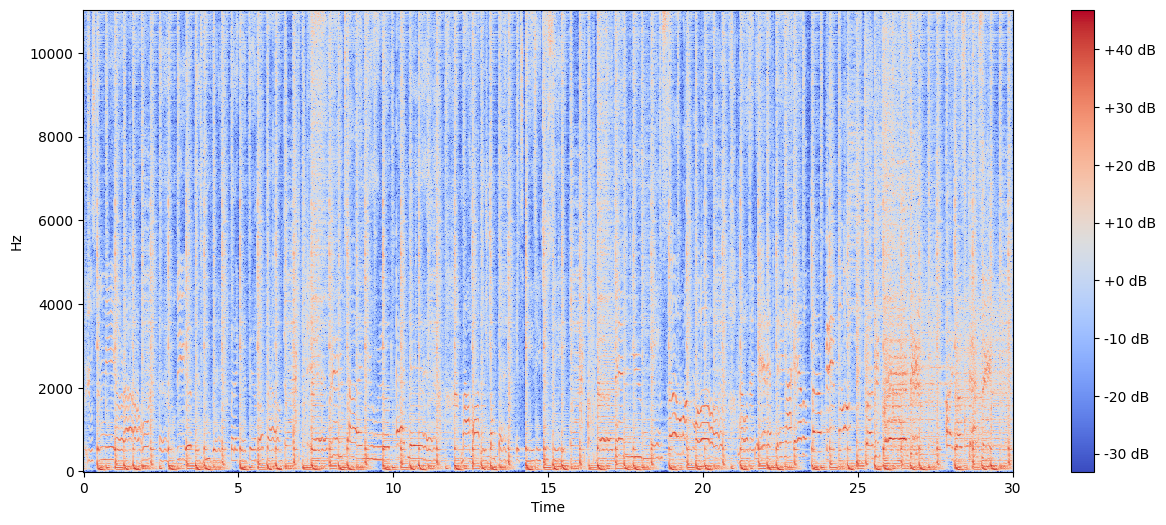

In [11]:
# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(15,6))

librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar(format='%+2.0f dB')


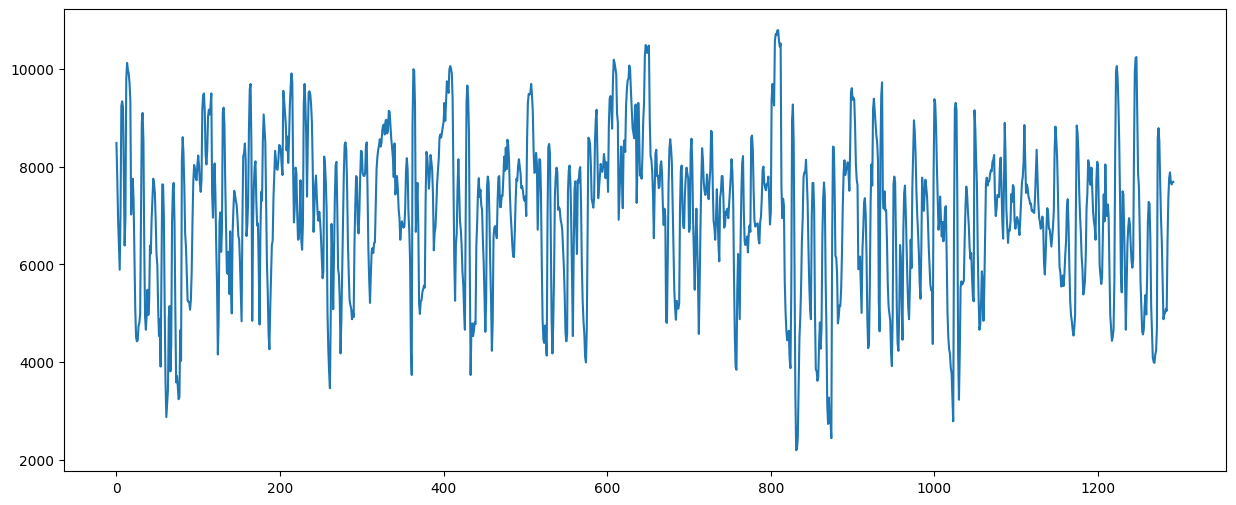

In [12]:
spectral_rolloff=librosa.feature.spectral_rolloff(y=data,sr=sr)[0]

plt.figure(figsize=(15,6))
plt.plot(spectral_rolloff)

Text(0.5, 1.0, 'Chroma Features')

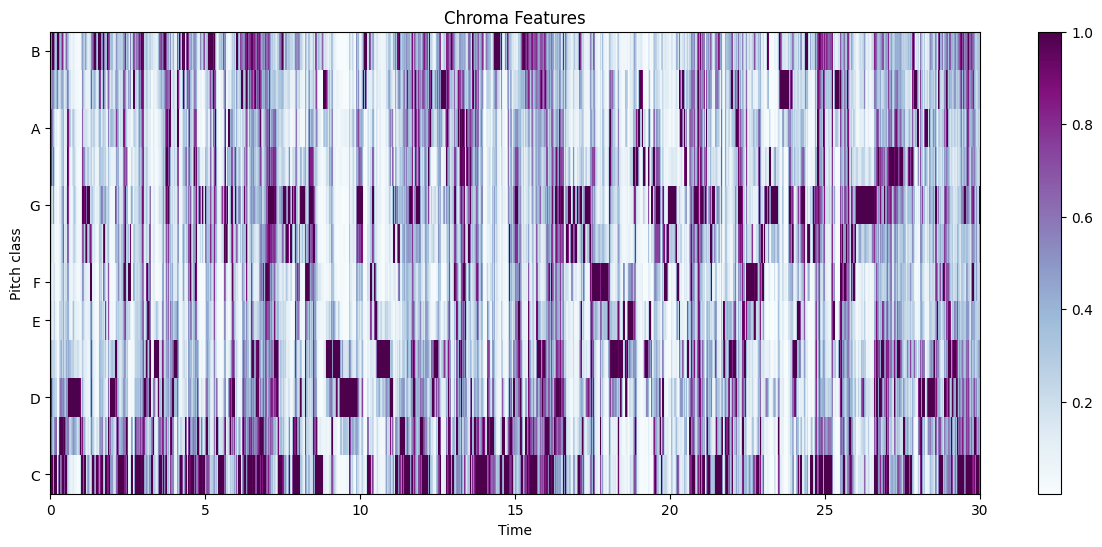

In [13]:
chroma = librosa.feature.chroma_stft(y=data,sr=sr)

plt.figure(figsize=(15,6))
librosa.display.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma", cmap="BuPu")
plt.colorbar()

plt.title("Chroma Features")

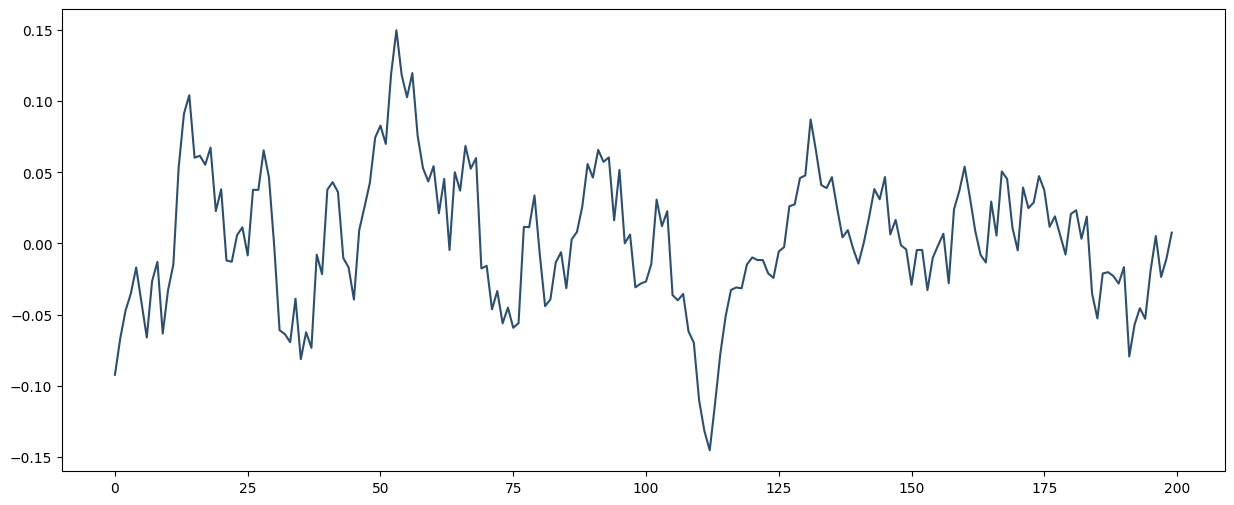

In [14]:
start=1000
end=1200
plt.figure(figsize=(15, 6))
plt.plot(data[start:end],color="#2B4F72")

In [15]:
zero_cross_rate=librosa.zero_crossings(data,pad=False)
print("The number of zero_crossings are :", sum(zero_cross_rate))

The number of zero_crossings are : 93841


In [16]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

# Model Training

In [74]:
X= df.drop(columns=["filename", "label"])
y = df[["label"]]  # so that it remains a DataFrame

In [75]:
std_scaler = StandardScaler()

In [76]:
scaled_df = std_scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=std_scaler.get_feature_names_out(X.columns))

In [98]:
joblib.dump(std_scaler, "std_scaler.pkl")

['std_scaler.pkl']

In [100]:
scaled_df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.132822,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.132822,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.132822,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,-0.132822,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.132822,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.132822,-0.325957,-0.757009,-0.783606,-0.744969,-0.270585,-0.467974,-0.258529,-0.502756,-0.202028,...,0.140217,-0.464398,-2.050383,-0.623944,0.511084,-0.783303,-1.167931,-0.305875,-0.025668,-0.446301
996,-0.132822,0.244975,-1.455644,-0.829723,-0.678065,-0.272410,-0.717688,-0.330003,-0.566898,-0.268240,...,0.566107,-0.796066,-1.513447,-0.694466,0.355178,-0.921994,-1.367241,-0.727623,-0.443273,-0.848395
997,-0.132822,0.654637,-1.431989,-0.750625,-0.751249,-0.173636,-0.594046,-0.599270,-0.646859,-0.343166,...,0.150753,-0.803610,-1.952593,-0.784951,0.758508,-0.805923,-2.732844,-0.638651,-0.263615,-0.890605
998,-0.132822,-0.198339,0.668144,-0.716978,-0.506618,-1.122245,-0.572432,-0.806175,-0.290319,-0.988510,...,-0.865330,-0.426656,-0.098962,-0.569286,0.271131,-0.854487,-0.722717,-0.511485,-0.650649,-0.637683


In [78]:
encoder = OneHotEncoder(sparse_output=False)

In [79]:
encoded_labels = encoder.fit_transform(y)

In [80]:
encoded_labels = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(y.columns))

In [81]:
prepped_data = pd.concat([scaled_df, encoded_labels], axis=1)

In [82]:
prepped_data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,label_blues,label_classical,label_country,label_disco,label_hiphop,label_jazz,label_metal,label_pop,label_reggae,label_rock
0,-0.132822,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.132822,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.132822,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.132822,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.132822,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, encoded_labels, test_size=0.2, random_state=42)

In [84]:
import tensorflow as tf
from tensorflow import keras

# Model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation='softmax'),  # Change 10 to the number of genres you have
])

# Custom optimizer with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)

# Compile the model with categorical cross-entropy (since labels are one-hot encoded)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Display model summary
model.summary()

# Training function
def train_model(model, epochs, X_train, y_train, batch_size=256):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    return history

# Training the model
model_history = train_model(model=model, epochs=600, X_train=X_train, y_train=y_train)


c:\Users\221sa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        30,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,098 (801.16 KB)

 Trainable params: 205,098 (801.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.0982 - loss: 2.3359 - val_accuracy: 0.0938 - val_loss: 2.3028
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1124 - loss: 2.3095 - val_accuracy: 0.1562 - val_loss: 2.2844
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1449 - loss: 2.2851 - val_accuracy: 0.1688 - val_loss: 2.2687
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1390 - loss: 2.2741 - val_accuracy: 0.2000 - val_loss: 2.2544
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1562 - loss: 2.2636 - val_accuracy: 0.1937 - val_loss: 2.2410
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1503 - loss: 2.2478 - val_accuracy: 0.1937 - val_loss: 2.2283
Epoch 7/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1744 - loss: 2.2367 - val_accuracy: 0.2000 - val_loss: 2.2166
Epoch 8/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1804 - loss: 2.2237 - val_accuracy: 0.2188 - val_loss

In [96]:
model.save("genre_classifier_model.h5")

# Model Evaluation

In [90]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [91]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [92]:
# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4 
# Jazz - 5  
# Metal - 6 
# Pop - 7
# Reggae - 8
# Rock - 9

In [95]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7400 - loss: 1.0045
The test loss is  1.0045064687728882
The best accuracy is:  74.00000095367432


Text(50.722222222222214, 0.5, 'True')

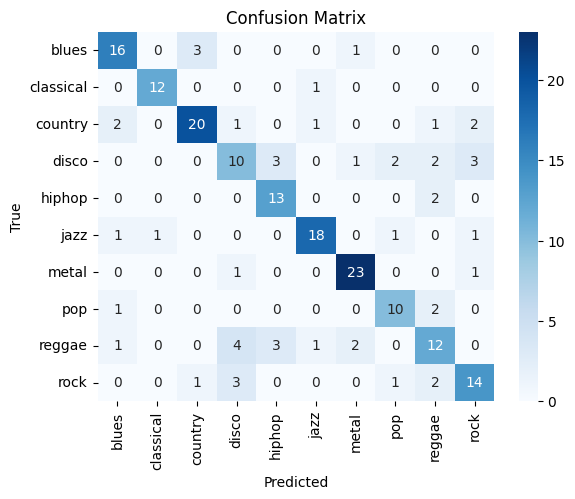

In [94]:
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), cmap="Blues", annot=True, fmt='g', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")